In [55]:
import sys
!{sys.executable} -m pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=cacaa555d6f460b19b3f6876bfce4088882d31297f75f41868473214fbb36d81
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import sklearn

In [3]:
df = pd.read_csv('Auto_Insurance_Claims.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02/03/2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df["Months Since Last Claim"].value_counts()

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
27    182
30    182
33    179
34    169
35    142
32    138
Name: Months Since Last Claim, dtype: int64

I generated a new 

In [6]:
df['Repeat Offender'] = df["Months Since Last Claim"].apply(lambda x: 0 if x >= 12 else 1)

In [7]:
df.head(1)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Repeat Offender
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0


In [8]:
df["Repeat Offender"].value_counts()

0    5288
1    3846
Name: Repeat Offender, dtype: int64

In [9]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [10]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Repeat Offender                  0
dtype: int64

In [11]:
df.mean()

Claim Amount                       800.494047
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
Repeat Offender                      0.421064
dtype: float64

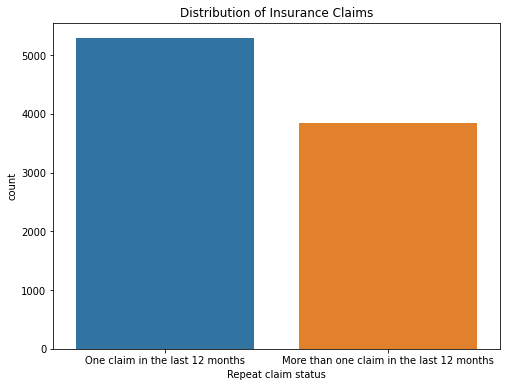

In [12]:
figure(figsize=(8,6))
sns.countplot(x='Repeat Offender',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['One claim in the last 12 months','More than one claim in the last 12 months'])
plt.title('Distribution of Insurance Claims')
plt.show()

How many Male drivers made repeat claims?
41.64%
How many Female drivers made repeat claims?
42.55%


C:\Users\home\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


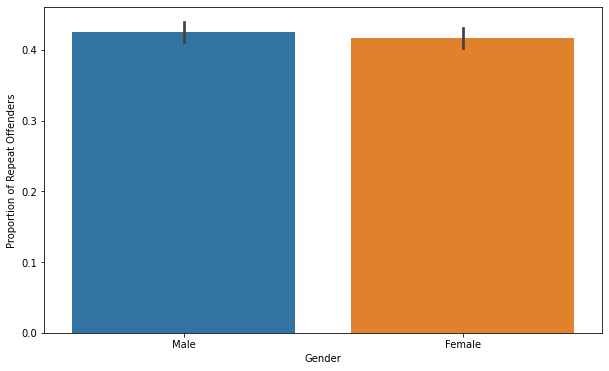

In [13]:
print("How many Male drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Gender"] == 'M'].value_counts(normalize = True)[1]))

print("How many Female drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Gender"] == 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.Gender, df["Repeat Offender"])
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Urban drivers made repeat claims?
44.82%
How many Rural drivers made repeat claims?
40.89%
How many Suburban drivers made repeat claims?
41.74%


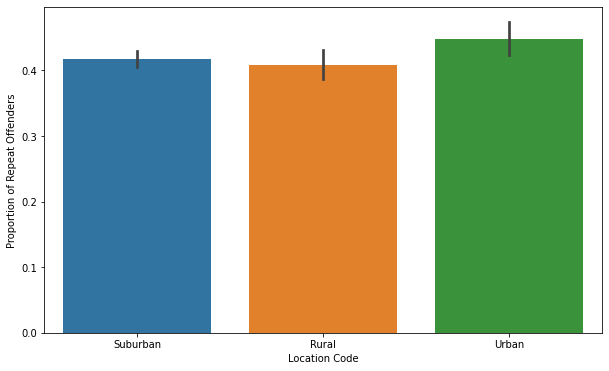

In [14]:
print("How many Urban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Rural'].value_counts(normalize = True)[1]))

print("How many Suburban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Suburban'].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Location Code',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Bachelor degree holders made repeat claims?
41.89%
How many policy holders with some College made repeat claims?
40.95%
How many Masters degree holders made repeat claims?
42.24%
How many High School or Below drivers made repeat claims?
43.29%
How many PhD holders made repeat claims?
43.57%


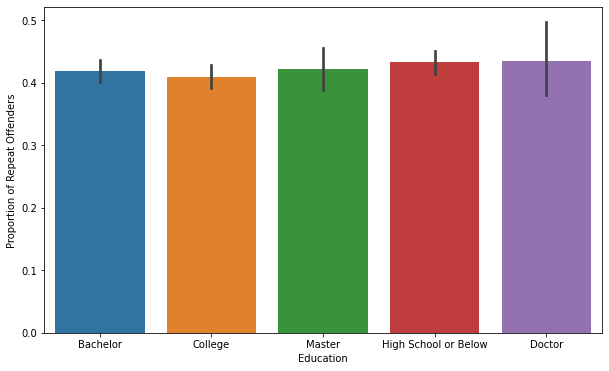

In [15]:
print("How many Bachelor degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'Bachelor'].value_counts(normalize = True)[1]))

print("How many policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'College'].value_counts(normalize = True)[1]))

print("How many Masters degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'Master'].value_counts(normalize = True)[1]))

print("How many High School or Below drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'High School or Below'].value_counts(normalize = True)[1]))

print("How many PhD holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == "Doctor"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Education',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Disabled Policy holders made repeat claims?
44.69%
How many Employed policy holders made repeat claims?
42.68%
How many policy holders on medical leave have made repeat claims?
38.43%
How many Retired policy holders have made repeat claims?
41.84%
How many Unemployed policy holders made repeat claims?
40.96%


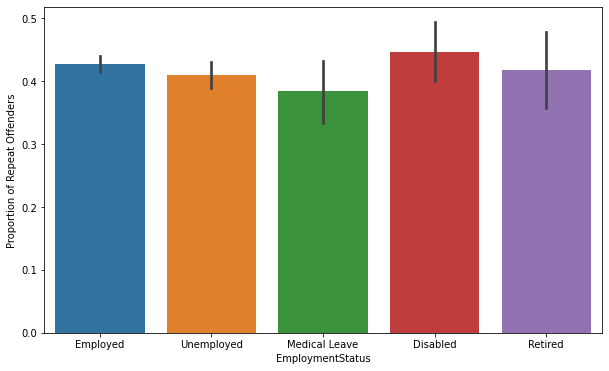

In [16]:
print("How many Disabled Policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Disabled'].value_counts(normalize = True)[1]))

print("How many Employed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Employed'].value_counts(normalize = True)[1]))

print("How many policy holders on medical leave have made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Medical Leave'].value_counts(normalize = True)[1]))

print("How many Retired policy holders have made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Retired'].value_counts(normalize = True)[1]))

print("How many Unemployed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == "Unemployed"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='EmploymentStatus',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Bachelor degree holders made repeat claims?
42.28%
How many policy holders with some College made repeat claims?
41.26%
How many Masters degree holders made repeat claims?
42.95%


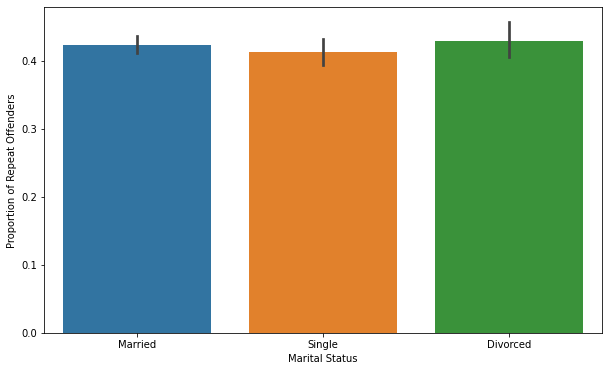

In [17]:
print("How many Bachelor degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Married'].value_counts(normalize = True)[1]))

print("How many policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Single'].value_counts(normalize = True)[1]))

print("How many Masters degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Divorced'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Marital Status',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Two-Door Car policy holders with repeat claims?
41.68%
How many Four-Door Car policy holders with some College made repeat claims?
41.10%
How many SUV Car policy holders made repeat claims?
44.54%
How many Luxury SUV policy holders with some College made repeat claims?
44.57%
How many Sports Car policy holders made repeat claims?
44.01%
How many Luxury Car policy degree holders made repeat claims?
40.49%


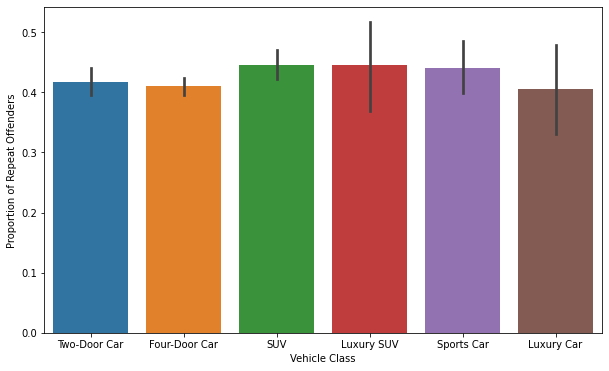

In [18]:
print("How many Two-Door Car policy holders with repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Two-Door Car'].value_counts(normalize = True)[1]))

print("How many Four-Door Car policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Four-Door Car'].value_counts(normalize = True)[1]))

print("How many SUV Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'SUV'].value_counts(normalize = True)[1]))

print("How many Luxury SUV policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Luxury SUV'].value_counts(normalize = True)[1]))

print("How many Sports Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Sports Car'].value_counts(normalize = True)[1]))

print("How many Luxury Car policy degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Luxury Car'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Class',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Medsize car policy holders made repeat claims?
41.63%
How many Small car policy holders with some College made repeat claims?
42.97%
How many Large car policy degree holders made repeat claims?
43.76%


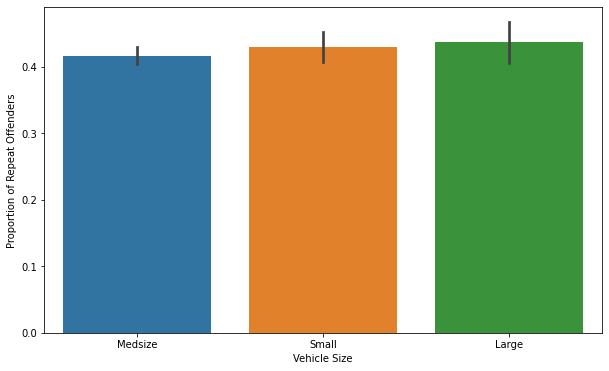

In [19]:
print("How many Medsize car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Medsize'].value_counts(normalize = True)[1]))

print("How many Small car policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Small'].value_counts(normalize = True)[1]))

print("How many Large car policy degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Large'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Size',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Kansas policy holders made repeat claims?
38.47%
How many Nebraska policy holders with some College made repeat claims?
42.69%
How many Oklahoma policy holders made repeat claims?
41.38%
How many Missouri policy holders made repeat claims?
42.00%
How many Iowa policy holders made repeat claims?
43.21%


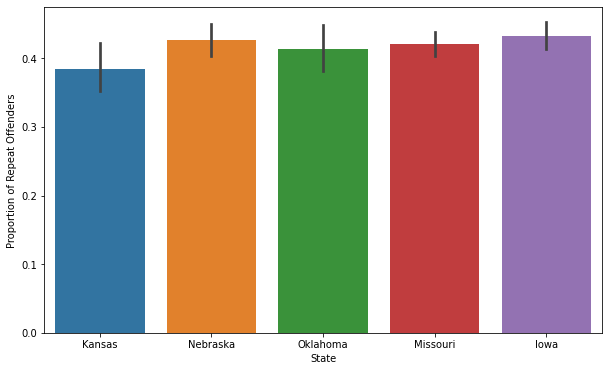

In [20]:
print("How many Kansas policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Kansas'].value_counts(normalize = True)[1]))

print("How many Nebraska policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Nebraska'].value_counts(normalize = True)[1]))

print("How many Oklahoma policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Oklahoma'].value_counts(normalize = True)[1]))

print("How many Missouri policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Missouri'].value_counts(normalize = True)[1]))

print("How many Iowa policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Iowa'].value_counts(normalize = True)[1]))




figure(figsize=(10,6))
sns.barplot(x='State',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

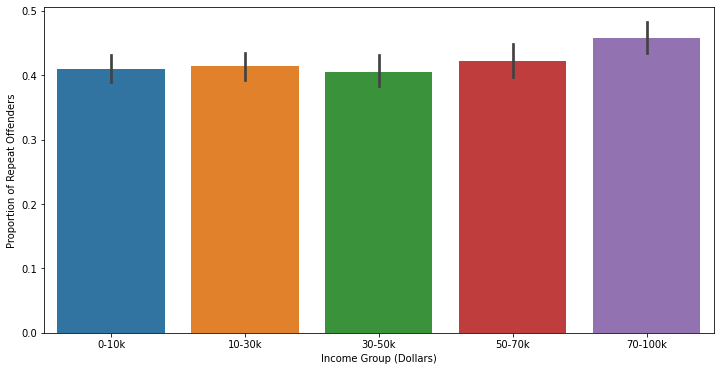

In [21]:
df["Income"] = pd.to_numeric(df["Income"], errors = 'coerce')
df['IncomeGroup'] = pd.cut(df["Income"], bins = [-np.inf, 10000, 30000, 50000, 70000, np.inf], labels = ['0-10k','10-30k', '30-50k', '50-70k', '70-100k',])
figure(figsize=(12,6))
sns.barplot(x='IncomeGroup',y="Repeat Offender", data=df)
plt.xlabel("Income Group (Dollars)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

In [22]:
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Repeat Offender,IncomeGroup
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,50-70k
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,0,0-10k
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0,30-50k
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,0,0-10k
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02/03/2011,Employed,...,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,30-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,02/10/2011,Employed,...,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize,0,70-100k
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,02/12/2011,Employed,...,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize,0,10-30k
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,02/06/2011,Unemployed,...,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize,1,0-10k
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,02/03/2011,Employed,...,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large,0,10-30k


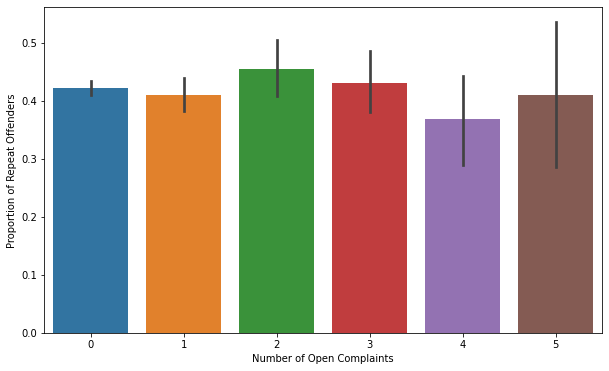

In [23]:
# print("How many Kansas policy holders made repeat claims?")
# print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Kansas'].value_counts(normalize = True)[1]))

# print("How many Nebraska policy holders with some College made repeat claims?")
# print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Nebraska'].value_counts(normalize = True)[1]))

# print("How many Oklahoma policy holders made repeat claims?")
# print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Oklahoma'].value_counts(normalize = True)[1]))

# print("How many Missouri policy holders made repeat claims?")
# print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Missouri'].value_counts(normalize = True)[1]))

# print("How many Iowa policy holders made repeat claims?")
# print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Iowa'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Number of Open Complaints',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many drivers without an open case made repeat claims?
42.15%
How many drivers with open cases made repeat claims?
41.92%


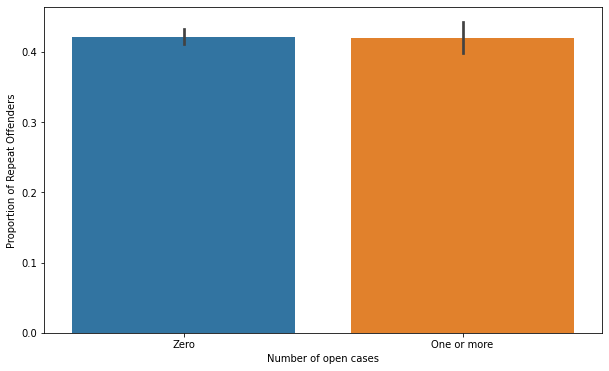

In [24]:
tempdf = df
tempdf["Open Cases?"]  = df["Number of Open Complaints"].apply(lambda x: 'Zero' if x == 0 else 'One or more')

print("How many drivers without an open case made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Open Cases?"] == 'Zero'].value_counts(normalize = True)[1]))

print("How many drivers with open cases made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Open Cases?"] == 'One or more'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='Open Cases?',y="Repeat Offender", data=df)
plt.xlabel('Number of open cases')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

In [25]:
df[(df["Repeat Offender"] == 1) & (df["Number of Open Complaints"] > 0)]

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Repeat Offender,IncomeGroup,Open Cases?
12,DP39365,US,MO,Missouri,879.879700,No,Premium,Master,02/06/2011,Employed,...,Corporate Auto,Corporate L1,Hail,Agent,472.029737,Four-Door Car,Medsize,1,70-100k,One or more
23,TZ98966,US,OK,Oklahoma,245.019100,No,Basic,Bachelor,2/24/11,Unemployed,...,Corporate Auto,Corporate L3,Collision,Branch,554.376763,Four-Door Car,Medsize,1,0-10k,One or more
30,SV85652,US,NE,Nebraska,245.458354,No,Basic,College,2/28/11,Employed,...,Personal Auto,Personal L2,Other,Call Center,322.294043,Four-Door Car,Small,1,10-30k,One or more
39,WC35801,US,NE,Nebraska,252.163310,No,Basic,High School or Below,02/07/2011,Employed,...,Personal Auto,Personal L3,Collision,Call Center,157.397849,Four-Door Car,Medsize,1,50-70k,One or more
40,QG25316,US,OK,Oklahoma,265.206179,No,Basic,High School or Below,1/18/11,Unemployed,...,Corporate Auto,Corporate L3,Scratch/Dent,Call Center,484.318536,Two-Door Car,Medsize,1,0-10k,One or more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,IX18485,US,MO,Missouri,959.424890,No,Extended,High School or Below,02/01/2011,Retired,...,Personal Auto,Personal L2,Collision,Agent,685.048914,Four-Door Car,Medsize,1,10-30k,One or more
9092,CO91673,US,MO,Missouri,454.732182,No,Basic,Bachelor,2/14/11,Medical Leave,...,Personal Auto,Personal L2,Hail,Agent,292.800000,Four-Door Car,Medsize,1,10-30k,One or more
9111,IJ25462,US,MO,Missouri,284.552093,No,Basic,Bachelor,02/07/2011,Employed,...,Personal Auto,Personal L2,Scratch/Dent,Agent,400.832857,Four-Door Car,Small,1,70-100k,One or more
9121,BB10681,US,MO,Missouri,414.064865,No,Extended,College,1/17/11,Unemployed,...,Corporate Auto,Corporate L3,Collision,Branch,590.400000,SUV,Medsize,1,0-10k,One or more


In [26]:
df['Repeat&Open'] = 0 

df.loc[(df["Repeat Offender"] == 1) & 
       (df["Number of Open Complaints"] > 0), 
       'Repeat&Open'] = 1 # then set class to 1

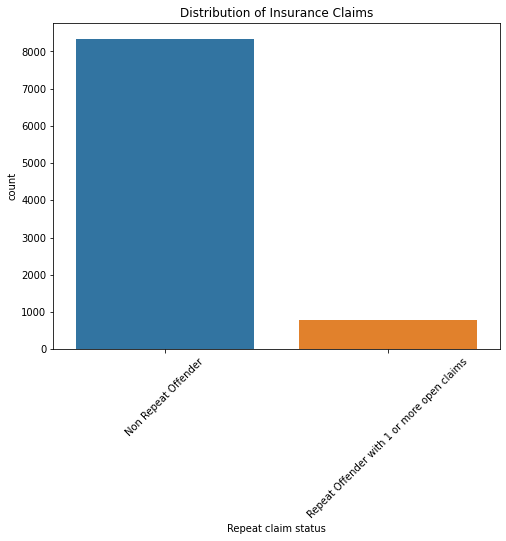

In [27]:
figure(figsize=(8,6))
sns.countplot(x='Repeat&Open',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['Non Repeat Offender','Repeat Offender with 1 or more open claims'])
plt.xticks(rotation=45)
plt.title('Distribution of Insurance Claims')
plt.show()

How many Male drivers made repeat claims while having 1 or more claims open?
8.31%
How many Female drivers made repeat claims?
8.95%


C:\Users\home\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


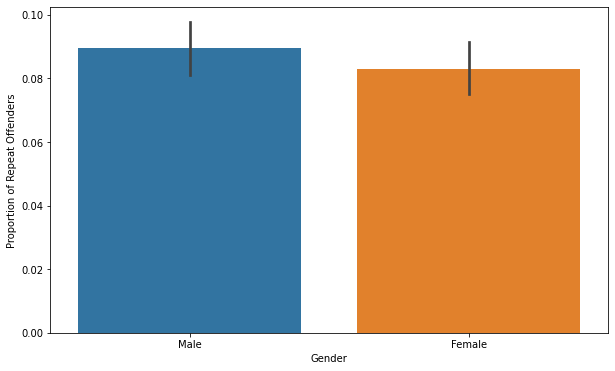

In [28]:
print("How many Male drivers made repeat claims while having 1 or more claims open?")
print("{:.2%}".format(df["Repeat&Open"][df["Gender"] == 'M'].value_counts(normalize = True)[1]))

print("How many Female drivers made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Gender"] == 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.Gender, df["Repeat&Open"])
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Urban drivers made repeat claims?
9.54%
How many Rural drivers made repeat claims?
8.91%
How many Suburban drivers made repeat claims?
8.31%


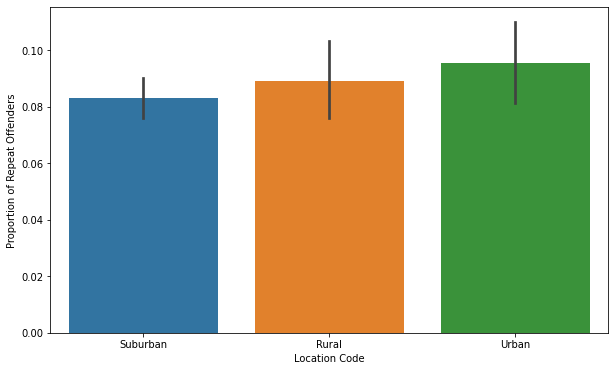

In [29]:
print("How many Urban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Rural'].value_counts(normalize = True)[1]))

print("How many Suburban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Suburban'].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Location Code',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Bachelor degree holders made repeat claims?
9.97%
How many policy holders with some College made repeat claims?
8.06%
How many Masters degree holders made repeat claims?
9.18%
How many High School or Below drivers made repeat claims?
7.70%
How many PhD holders made repeat claims?
8.48%


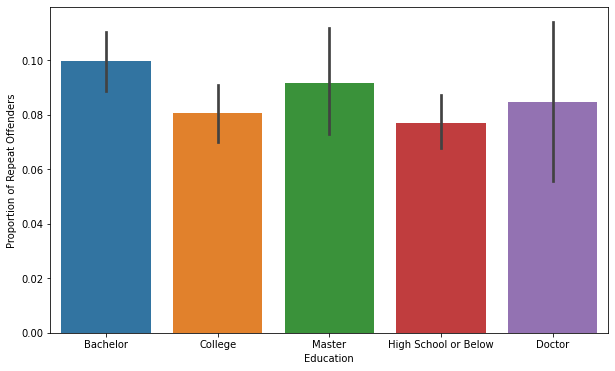

In [30]:
print("How many Bachelor degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'Bachelor'].value_counts(normalize = True)[1]))

print("How many policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'College'].value_counts(normalize = True)[1]))

print("How many Masters degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'Master'].value_counts(normalize = True)[1]))

print("How many High School or Below drivers made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'High School or Below'].value_counts(normalize = True)[1]))

print("How many PhD holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == "Doctor"].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Education',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Disabled Policy holders made repeat claims?
4.69%
How many Employed policy holders made repeat claims?
8.99%
How many policy holders on medical leave have made repeat claims?
8.33%
How many Retired policy holders have made repeat claims?
13.83%
How many Unemployed policy holders made repeat claims?
7.90%


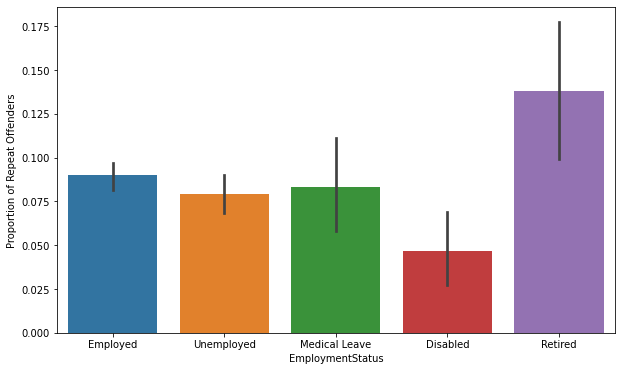

In [31]:
print("How many Disabled Policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Disabled'].value_counts(normalize = True)[1]))

print("How many Employed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Employed'].value_counts(normalize = True)[1]))

print("How many policy holders on medical leave have made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Medical Leave'].value_counts(normalize = True)[1]))

print("How many Retired policy holders have made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Retired'].value_counts(normalize = True)[1]))

print("How many Unemployed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == "Unemployed"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='EmploymentStatus',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Two-Door Car policy holders with repeat claims?
7.95%
How many Four-Door Car policy holders with repeat claims?
9.00%
How many SUV Car policy holders made repeat claims?
8.07%
How many Luxury SUV policy holders made repeat claims?
14.13%
How many Sports Car policy holders made repeat claims?
6.82%
How many Luxury Car policy degree holders made repeat claims?
11.66%


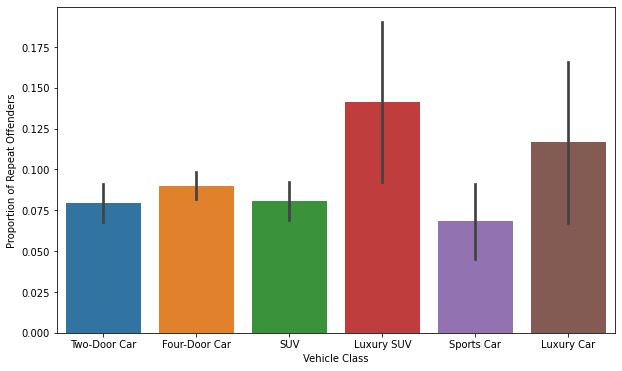

In [32]:
print("How many Two-Door Car policy holders with repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Two-Door Car'].value_counts(normalize = True)[1]))

print("How many Four-Door Car policy holders with repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Four-Door Car'].value_counts(normalize = True)[1]))

print("How many SUV Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'SUV'].value_counts(normalize = True)[1]))

print("How many Luxury SUV policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Luxury SUV'].value_counts(normalize = True)[1]))

print("How many Sports Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Sports Car'].value_counts(normalize = True)[1]))

print("How many Luxury Car policy degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Luxury Car'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Class',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

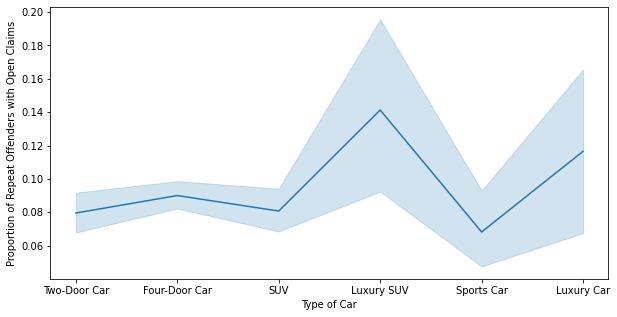

In [33]:
figure(figsize=(10,5))
sns.lineplot(x="Vehicle Class",y="Repeat&Open",data=df)
plt.xlabel("Type of Car")
plt.ylabel("Proportion of Repeat Offenders with Open Claims")
plt.show()

How many Married policy holders made repeat claims?
8.68%
How many Singe policy holders made repeat claims?
8.15%
How many Divorced degree holders made repeat claims?
9.35%


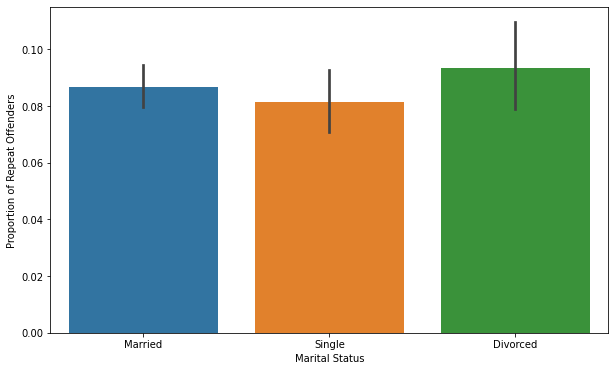

In [34]:
print("How many Married policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Married'].value_counts(normalize = True)[1]))

print("How many Singe policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Single'].value_counts(normalize = True)[1]))

print("How many Divorced degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Divorced'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Marital Status',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Medsize car policy holders made repeat claims?
8.76%
How many Small car policy holders made repeat claims?
7.88%
How many Large car policy  made repeat claims?
9.20%


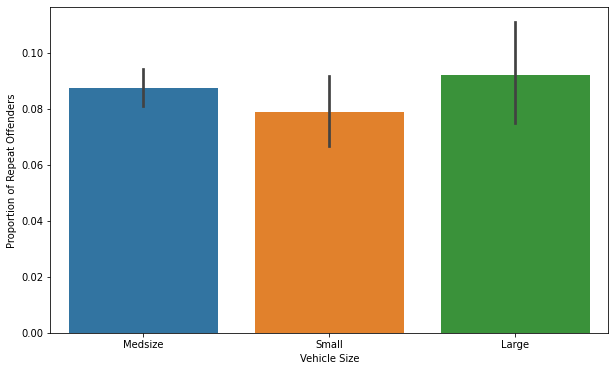

In [35]:
print("How many Medsize car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Medsize'].value_counts(normalize = True)[1]))

print("How many Small car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Small'].value_counts(normalize = True)[1]))

print("How many Large car policy  made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Large'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Size',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

How many Kansas policy holders made repeat claims?
8.15%
How many Nebraska policy holders with some College made repeat claims?
7.99%
How many Oklahoma policy holders made repeat claims?
8.84%
How many Missouri policy holders made repeat claims?
9.43%
How many Iowa policy holders made repeat claims?
8.19%


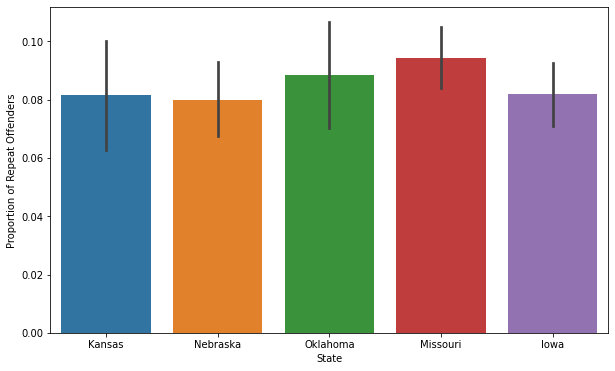

In [36]:
print("How many Kansas policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Kansas'].value_counts(normalize = True)[1]))

print("How many Nebraska policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Nebraska'].value_counts(normalize = True)[1]))

print("How many Oklahoma policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Oklahoma'].value_counts(normalize = True)[1]))

print("How many Missouri policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Missouri'].value_counts(normalize = True)[1]))

print("How many Iowa policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Iowa'].value_counts(normalize = True)[1]))




figure(figsize=(10,6))
sns.barplot(x='State',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

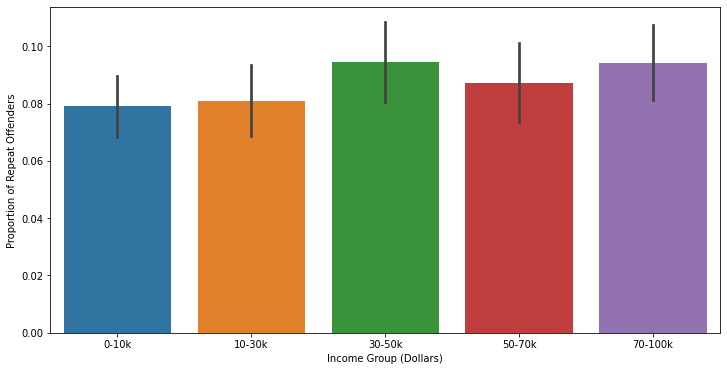

In [37]:
figure(figsize=(12,6))
sns.barplot(x='IncomeGroup',y="Repeat&Open", data=df)
plt.xlabel("Income Group (Dollars)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

In [39]:
y = df["Repeat&Open"]

In [40]:
df["EmploymentStatus"] = df.EmploymentStatus.apply(lambda x: 1 if x == 'Retired' else 0)
df['Vehicle Class'] = df['Vehicle Class'].apply(lambda x: 1 if x == 'Luxury Car' or x == 'Luxury SUV'  else 0)

In [41]:
features = ['Vehicle Class', 'EmploymentStatus']

In [42]:
X = df[features]

In [50]:
X

,Vehicle Class,EmploymentStatus
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9129,0,0
9130,0,0
9131,0,0
9132,0,0


In [51]:
X.describe()

,Vehicle Class,EmploymentStatus
count,9134.000000,9134.000000
mean,0.037990,0.030874
std,0.191182,0.172985
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [57]:
# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [59]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)



87.52


In [60]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

91.96


In [61]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)



91.96


In [63]:
#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

91.96


In [64]:
# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)



91.96


In [65]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

91.96


In [66]:
# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

91.96


In [67]:
df.corr()

,Claim Amount,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Class,Repeat Offender,Repeat&Open
Claim Amount,1.000000,-0.013433,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,0.262780,-0.000727,-0.004094
EmploymentStatus,-0.013433,1.000000,-0.100484,-0.009342,-0.012275,0.002989,0.002505,-0.026604,0.034293,-0.012293,-0.000949,0.032986
Income,0.024366,-0.100484,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,-0.003610,0.034406,0.020217
Monthly Premium Auto,0.396262,-0.009342,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.689994,0.009194,0.011417
Months Since Last Claim,0.011517,-0.012275,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,0.005421,-0.829674,-0.302308
Months Since Policy Inception,0.009418,0.002989,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.022546,0.043114,0.008394
Number of Open Complaints,-0.036343,0.002505,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.000241,-0.002523,0.498619
Number of Policies,0.021955,-0.026604,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.002219,-0.017247,-0.009834
Total Claim Amount,0.226451,0.034293,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.462574,-0.007527,-0.008704
Vehicle Class,0.262780,-0.012293,-0.003610,0.689994,0.005421,0.022546,-0.000241,-0.002219,0.462574,1.000000,0.002193,0.030631


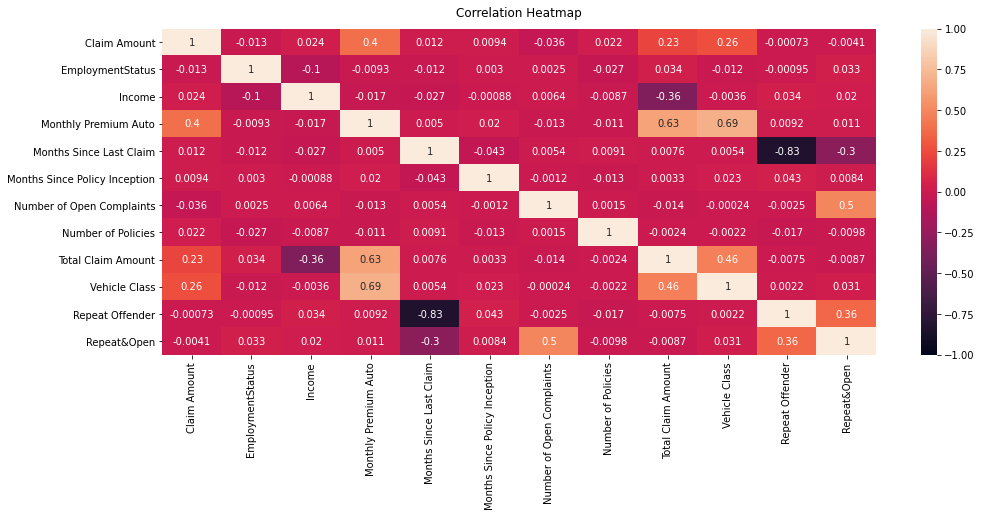

In [69]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);